In [3]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Zanim przejdziemy do statystyk, czas zrozumieć czym jest histogram 
# i jak on pomoże nam w późniejszej analizie. Weźmy dane z kolumny Age 
# bez wartości brakujących (bo takie tam są) i przypiszmy je do zmiennej 
# age_values.

In [30]:
age_values = dataset.loc[dataset['Age'].notnull(), 'Age'].values
print(age_values.shape)
#print(age_values)

(714,)


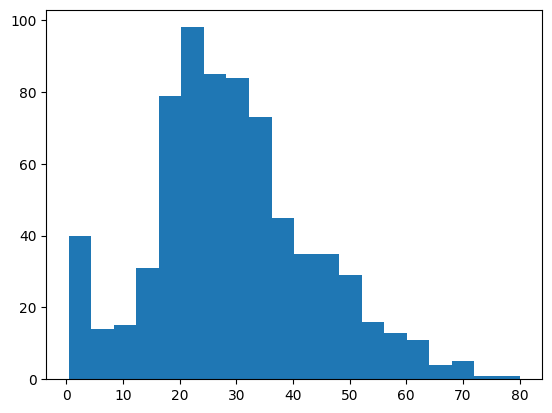

In [6]:
plt.hist(age_values, bins=20)
plt.show()

In [7]:
mean_age = np.round(np.mean(age_values))
print(mean_age)

30.0


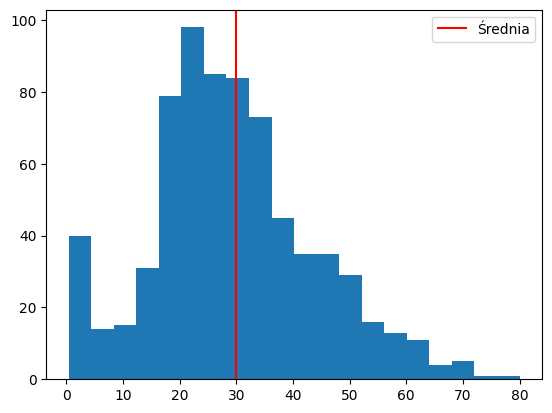

In [8]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

In [9]:
median_age = np.median(age_values)
print(median_age)

28.0


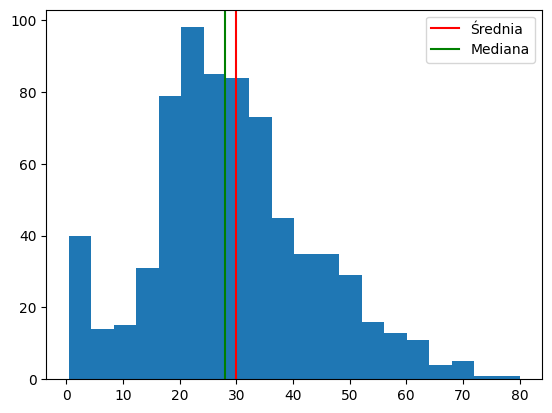

In [10]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

In [17]:
mode_age = stats.mode(age_values, keepdims = False)
print(mode_age)

ModeResult(mode=24.0, count=30)


In [18]:
q0 = np.quantile(age_values, 0.0)
q1 = np.round(np.quantile(age_values, 0.25))
q3 = np.round(np.quantile(age_values, 0.75))
q4 = np.round(np.quantile(age_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_age}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.42
Q1: 20.0
Q2: 28.0
Q3: 38.0
Q4: 80.0


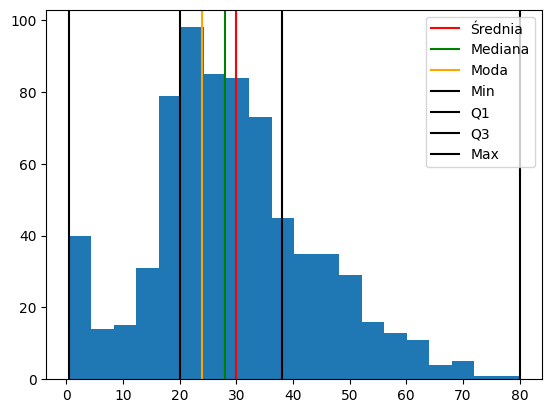

In [19]:
plt.hist(age_values, bins=20)
plt.axvline(x = mean_age, color='red', label = 'Średnia')
plt.axvline(x = median_age, color='green', label = 'Mediana')
plt.axvline(x = mode_age[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [21]:
range_age = max(age_values)-min(age_values)
print(range_age)

79.58


In [22]:
iqr = q3 - q1
print(iqr)

18.0


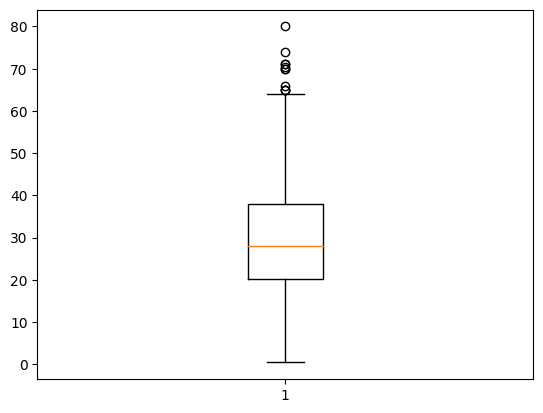

In [23]:
plt.boxplot(age_values)
plt.show()

In [26]:
variance_age = np.var(age_values, ddof=1)
print(variance_age)

211.01912474630805


In [27]:
print(variance_age**(1/2))

14.526497332334042


In [28]:
standard_deviation_age = np.std(age_values, ddof=1)
print(standard_deviation_age)

14.526497332334042


In [ ]:
# Skalowanie zmiennej
# Standaryzacja

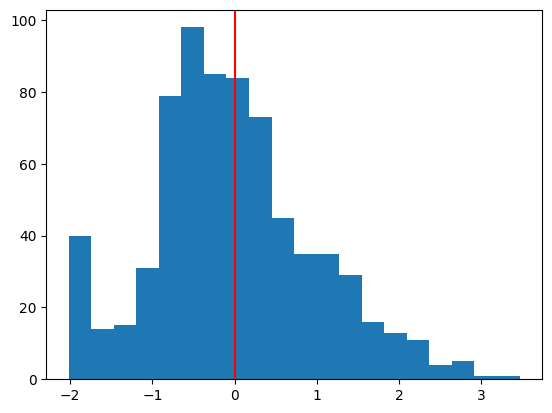

Średnia: 2.338621049070358e-16
Odchylenie standardowe: 1.000701016559981


In [31]:
scaler_standardized = StandardScaler()
standardized_age_values = scaler_standardized.fit_transform(age_values.reshape(-1, 1))
plt.hist(standardized_age_values, bins=20)
plt.axvline(x = standardized_age_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_age_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_age_values, ddof=1)}')

In [33]:
# Min Max Scaler to kolejna technika do skalowania, w której wartości są przesuwane i przeskalowywane w taki sposób, aby 
# ostatecznie znalazły się w przedziale od 0 do 1

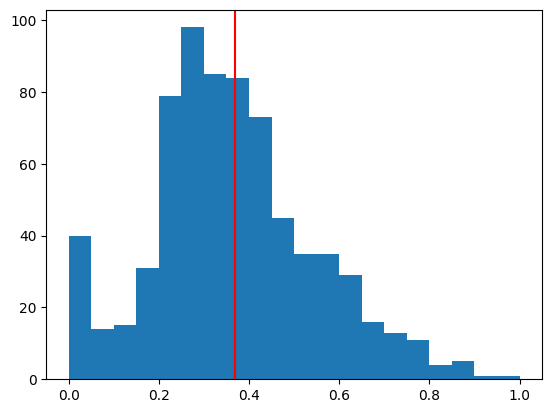

Średnia: 0.3679205534940792
Odchylenie standardowe: 0.1825395492879372


In [34]:
scaler_MinMax = MinMaxScaler()
normalized_age_values = scaler_MinMax.fit_transform(age_values.reshape(-1, 1))
plt.hist(normalized_age_values, bins=20)
plt.axvline(x = normalized_age_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_age_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_age_values, ddof=1)}')

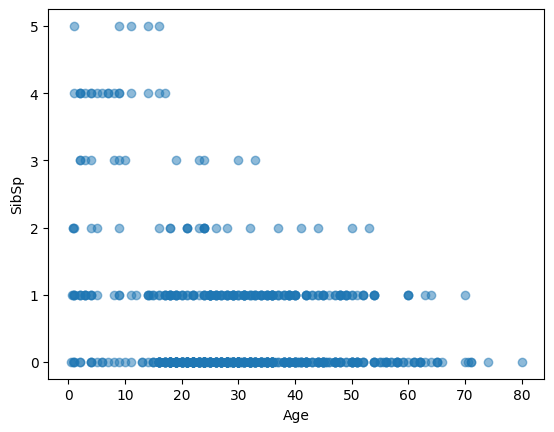

In [35]:
,


In [ ]:
# Widzimy taki związek pomiędzy zmiennymi losowymi, zatem chcielibyśmy obliczyć metrykę, która pokaże nam,
# jak silny jest to związek.

# Do tego wyliczymy najpopularniejszy współczynnik korelacji – korelację Pearsona.

In [40]:
stats.pearsonr(age_values, sibsb_values)

PearsonRResult(statistic=-0.3082467589236564, pvalue=3.5090251937831574e-17)

In [ ]:
###############################################
# 10.3 Probability Calculation                #
###############################################

In [ ]:
# 10.3.3 Bayes Theorem

In [1]:
def bayes_theorem(p_a, p_b_given_a, p_b):
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

# P(A)
p_a = 0.10

# P(B|A)
p_b_given_a = 0.07

# P(B|not A)
p_b = 0.05

# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b)

# summarize
print('P(A|B) = %.2f%%' % (result * 100))

P(A|B) = 14.00%


In [ ]:
# 10.3.6 Bernouli Distribution

[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


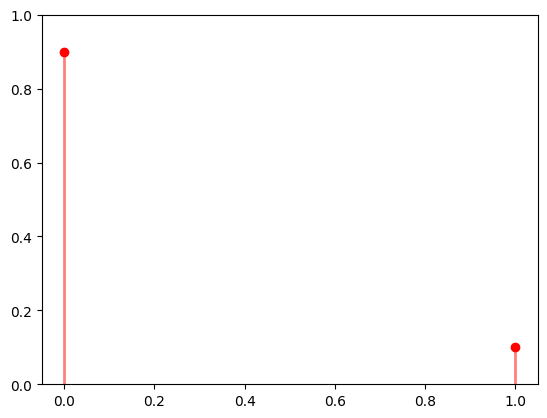

In [4]:
p = 0.1
n = 100
bern_func = stats.bernoulli.rvs(p, size=n)
print(bern_func)
bern_probability = [bern_func[bern_func==0].shape[0]/bern_func.shape[0],
                    bern_func[bern_func==1].shape[0]/bern_func.shape[0]]
plt.scatter([0, 1], bern_probability, color='red')
plt.vlines([0, 1], 0, bern_probability, color='red', lw=2, alpha=0.5)
plt.ylim([0, 1])
plt.show()

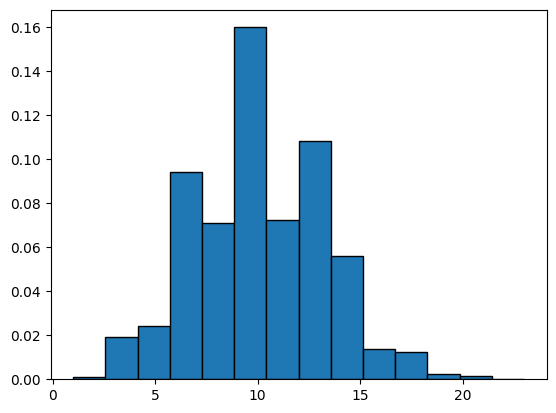

Prawdopodobieństwo, że w następnych 15 minutach będzie 5 połączeń:
0.93


In [13]:
poisson_set = stats.poisson.rvs(mu=10, size=10000)

plt.hist(poisson_set, density=True, edgecolor='black', bins=14)
plt.show()

print('Prawdopodobieństwo, że w następnych 15 minutach będzie 5 połączeń:')
print(np.round(1 - stats.poisson.cdf(k=5, mu=10), 2))

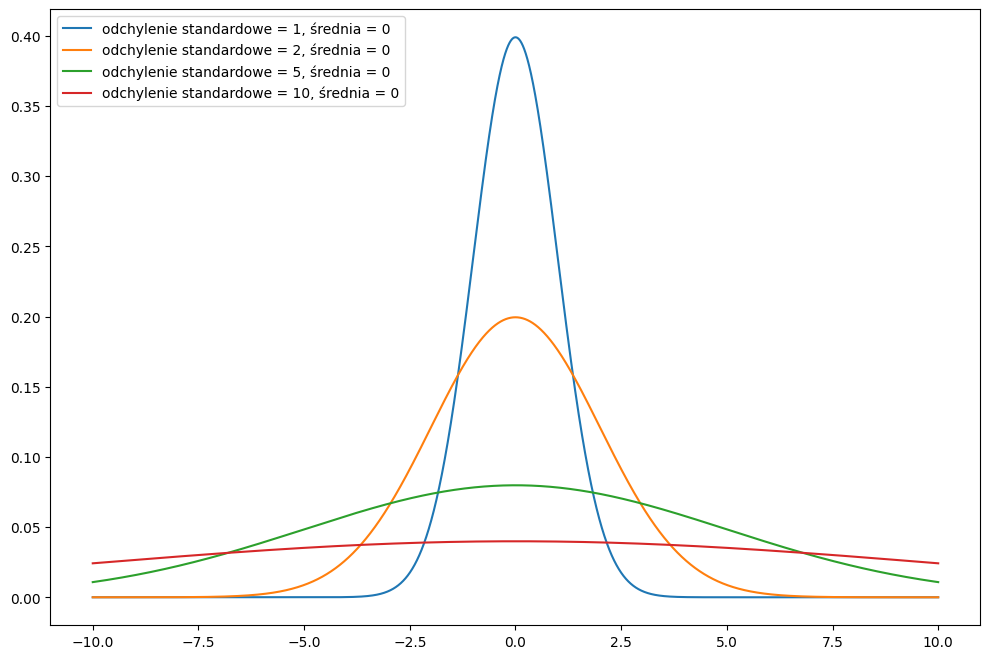

In [14]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-10, 10, 10000)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1), label='odchylenie standardowe = 1, średnia = 0')
plt.plot(x, gauss(x, sigma=2), label='odchylenie standardowe = 2, średnia = 0')
plt.plot(x, gauss(x, sigma=5), label='odchylenie standardowe = 5, średnia = 0')
plt.plot(x, gauss(x, sigma=10), label='odchylenie standardowe = 10, średnia = 0')
plt.legend(loc='upper left')
plt.show()

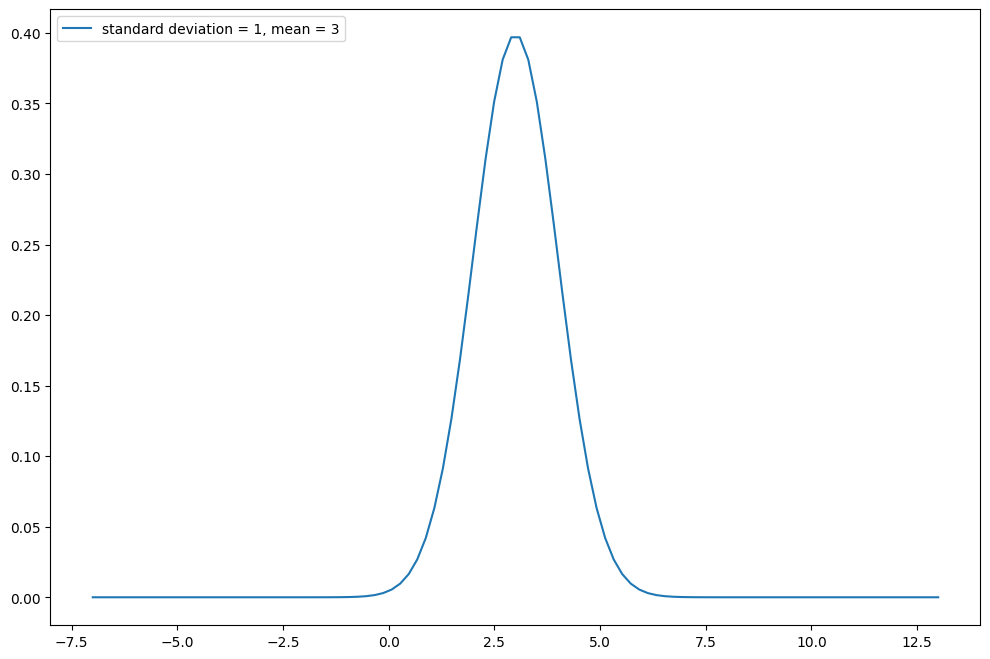

In [49]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-7, 13, 100)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1, mu =3), label='standard deviation = 1, mean = 3')
plt.legend(loc='upper left')
plt.show()

In [52]:
y = gauss(x,sigma=1, mu =3)
print(y[40:60])
print(y.shape)
print(sum(y))
print(sum(y)/100)

[0.06325461 0.09132982 0.12659268 0.16845351 0.21519246 0.26390617
 0.31070449 0.35117292 0.38103951 0.39691225 0.39691225 0.38103951
 0.35117292 0.31070449 0.26390617 0.21519246 0.16845351 0.12659268
 0.09132982 0.06325461]
(100,)
4.949999999999998
0.04949999999999998


In [53]:
q0 = np.quantile(y, 0.0)
q1 = np.round(np.quantile(y, 0.25),decimals = 10)
q2 = np.round(np.quantile(y, 0.5) ,decimals = 10)
q3 = np.round(np.quantile(y, 0.75),decimals = 10)
q4 = np.round(np.quantile(y, 1.0) ,decimals = 10)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 7.69459862670642e-23
Q1: 0.0
Q2: 1.3002e-06
Q3: 0.0164506763
Q4: 0.3969122508


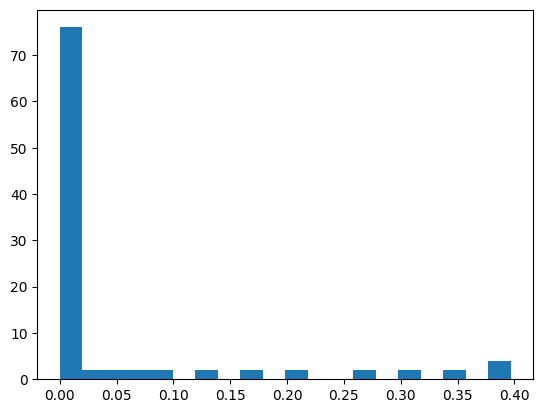

In [54]:
plt.hist(y, bins=20)
plt.show()

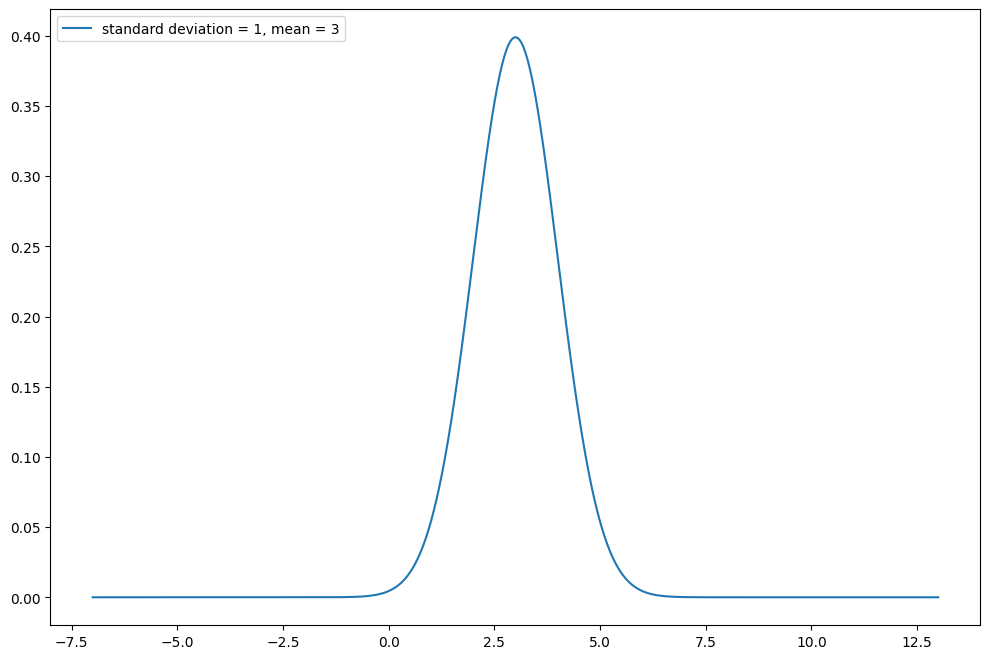

In [44]:
def gauss(x, sigma=1, mu=0):
    return stats.norm.pdf(x, mu, sigma)
x = np.linspace(-7, 13, 10000)
plt.figure(figsize=(12, 8))
plt.plot(x, gauss(x, sigma=1, mu =3), label='standard deviation = 1, mean = 3')
plt.legend(loc='upper left')
plt.show()

In [46]:
y = gauss(x,sigma=1, mu =3)
print(y[4980:5020])
print(y.shape)
print(sum(y))
print(sum(y)/10000)

[0.39863894 0.39866924 0.39869795 0.39872507 0.3987506  0.39877453
 0.39879686 0.39881761 0.39883675 0.39885431 0.39887026 0.39888463
 0.39889739 0.39890856 0.39891814 0.39892612 0.3989325  0.39893729
 0.39894048 0.39894208 0.39894208 0.39894048 0.39893729 0.3989325
 0.39892612 0.39891814 0.39890856 0.39889739 0.39888463 0.39887026
 0.39885431 0.39883675 0.39881761 0.39879686 0.39877453 0.3987506
 0.39872507 0.39869795 0.39866924 0.39863894]
(10000,)
499.94999999999857
0.04999499999999986


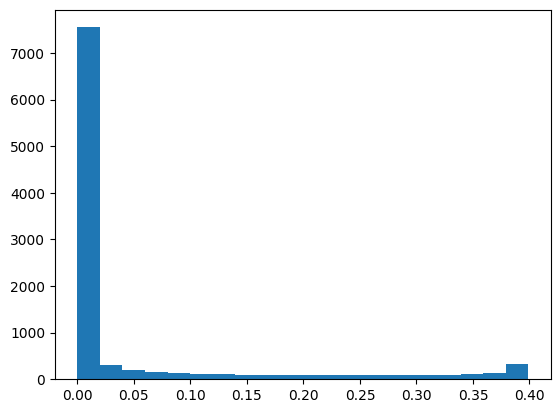

In [26]:
plt.hist(y, bins=20)
plt.show()

In [48]:
q0 = np.quantile(y, 0.0)
q1 = np.round(np.quantile(y, 0.25),decimals = 10)
q2 = np.round(np.quantile(y, 0.5) ,decimals = 10)
q3 = np.round(np.quantile(y, 0.75),decimals = 10)
q4 = np.round(np.quantile(y, 1.0) ,decimals = 10)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 7.69459862670642e-23
Q1: 0.0
Q2: 1.483e-06
Q3: 0.017495492
Q4: 0.3989420809
